In [55]:
!pip install kaggle

In [56]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory
chmod: /Users/adityakhanna/.kaggle/kaggle.json: No such file or directory


Importing Face Mask Dataset

In [57]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

/Users/adityakhanna/Desktop/Project/Machine Learning Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Traceback (most recent call last):
  File "/Users/adityakhanna/Desktop/Project/Machine Learning Project/.venv/bin/kaggle", line 10, in <module>
    sys.exit(main())
  File "/Users/adityakhanna/Desktop/Project/Machine Learning Project/.venv/lib/python3.9/site-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
  File "/Users/adityakhanna/Desktop/Project/Machine Learning Project/.venv/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
  File "/Users/adityakhanna/Desktop/Project/Machine Learning Project/.venv/lib/python3.9/site-packages/kaggle/api/kaggle_api_extende

In [58]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [59]:
!ls

DL_Project_5_face_Mask_Detection_using_CNN.ipynb
archive.zip
data
profile.png


**Importing the Dependencies**

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # OpenCV
from PIL import Image
from sklearn.model_selection import train_test_split


In [61]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']
['with_mask_783.jpg', 'with_mask_1336.jpg', 'with_mask_1450.jpg', 'with_mask_2159.jpg', 'with_mask_3247.jpg']


In [62]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']
['without_mask_2870.jpg', 'without_mask_2858.jpg', 'without_mask_2680.jpg', 'without_mask_1389.jpg', 'without_mask_2694.jpg']


In [63]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [64]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [65]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [66]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [67]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

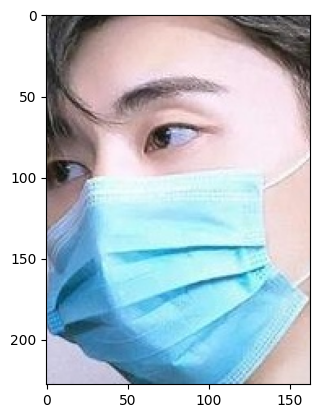

In [68]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

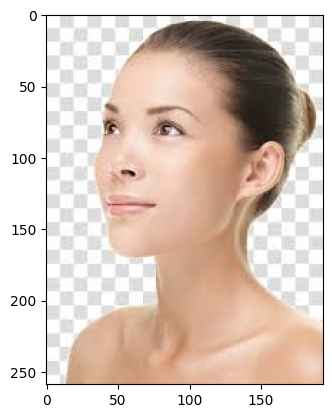

In [69]:
# displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [94]:
with_mask_path = 'data/with_mask/'
without_mask_path = 'data/without_mask/'

with_mask_files = sorted(os.listdir(with_mask_path))
without_mask_files = sorted(os.listdir(without_mask_path))

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


In [95]:
type(data)

list

In [96]:
len(data)

7553

In [97]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [98]:
type(data[0])

numpy.ndarray

In [99]:
data[0].shape

(128, 128, 3)

In [100]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [101]:
type(X)

numpy.ndarray

In [102]:
type(Y)

numpy.ndarray

In [103]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [104]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [106]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [107]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [108]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

**Building a Convolutional Neural Networks (CNN)**

In [109]:
import tensorflow as tf
from tensorflow import keras

In [111]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [112]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [113]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=3)

Epoch 1/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - acc: 0.6964 - loss: 0.5873 - val_acc: 0.8893 - val_loss: 0.2645
Epoch 2/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - acc: 0.8920 - loss: 0.2685 - val_acc: 0.9140 - val_loss: 0.2339
Epoch 3/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 51s 302ms/step - acc: 0.9083 - loss: 0.2249 - val_acc: 0.9207 - val_loss: 0.2308


**Model Evaluation**

In [114]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - acc: 0.9181 - loss: 0.1977
Test Accuracy = 0.9152879118919373


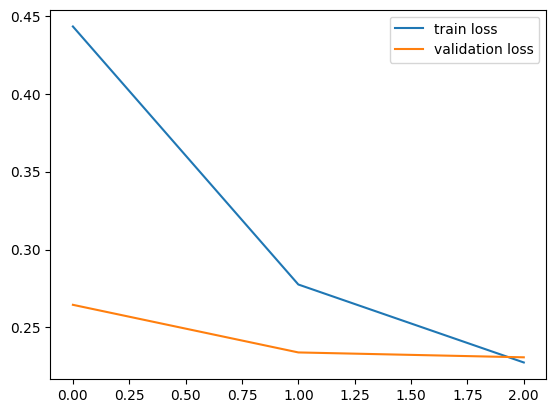

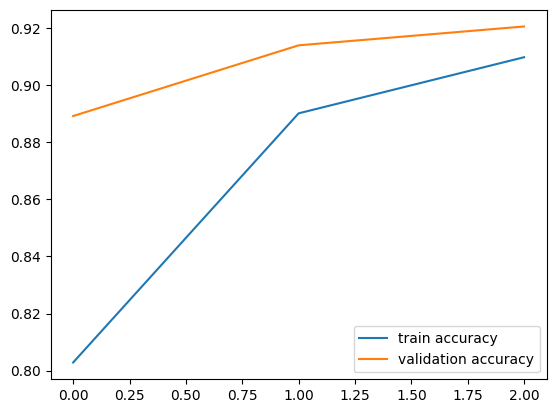

In [115]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [119]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Convert to RGB to match training data
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

cv2.imshow("Input Image", cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR))  # To show correctly in OpenCV

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

print(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[4.025487e-05 9.915616e-01]]
1
The person in the image is wearing a mask


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - acc: 0.9181 - loss: 0.1977
Test Accuracy = 0.9152879118919373
